In [1]:
from scipy.io import loadmat
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import cmath
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.python.keras.utils.vis_utils import plot_model
import pandas as pd

In [2]:
drive.mount('/content/drive')

data = loadmat('/content/drive/MyDrive/dataset1.mat')

Mounted at /content/drive


In [3]:
rec_d = np.array(data['receivedSignal4N'])
tra_d = np.array(data['transmitSignal'])
irs = np.array(data['pilotMatrix4N'])

In [4]:
x1_train = tra_d
x1_test = tra_d
x2_train = irs[:,0:3*4096]
x2_test = irs[:,3*4096:]
y_train = rec_d[:,0:3*4096]
y_test = rec_d[:,3*4096:]

In [5]:
M, N4 = x2_train.shape
K, N4 = y_train.shape
nt = rec_d.shape[1] - N4
#print(rec_d.shape)

In [6]:
x2_tr = np.zeros((N4,N4))
x2_tr[:M,:] = x2_train 
x1_tr = np.zeros((K,N4))
x1_tr[0,0] += x1_train[0] 
for i in range(N4):
  for j in range(K):
    x1_tr[j,i] = x1_tr[j,i] + x1_train[j] 

y_tr = y_train
y_t = y_test

In [7]:
# Linear Regression 
class LinearRegression() : 
  def __init__( self, learning_rate, iterations ) : 
    self.learning_rate = learning_rate 
		
    self.iterations = iterations 
		
	# Function for model training 
			
  def fit( self, X1, X2, Y ) : 
		
		# no_of_training_examples, no_of_features 
    self.m1, self.n1 = X1.shape 
    self.m2, self.n2 = X2.shape
    self.m3, self.n3 = Y.shape
		# weight initialization 
		
    self.H1 = np.zeros((self.m1,self.n1))
    self.H2 = np.zeros((self.m1, self.m2))
		 
		
    self.b = np.zeros((self.m3, self.n3))
		
    self.X1 = X1
    self.X2 = X2 
		
    self.Y = Y 
		
		
		# gradient descent learning 
				
    for i in range( self.iterations ) : 
      self.update_weights() 
      return self
	
	# Helper function to update weights in gradient descent 
	
  def update_weights( self ) : 
    Y_pred = self.predict( self.X1, self.X2 ) 
		
		# calculate gradients 
	
    dH1 = - ( 2 * np.multiply(( self.X1 ),( self.Y - Y_pred ) )) / self.n1 

    dH2 = - ( 2 * np.multiply((self.X1).dot(self.X2),( self.Y - Y_pred ) ) )/ self.n1
	
    db = - 2 * ( self.Y - Y_pred ) / self.n1 
		
		# update weights 
	
    self.H1 = self.H1 - self.learning_rate * dH1
    self.H2 = self.H2 - self.learning_rate * dH2 
	
    self.b = self.b - self.learning_rate * db 
		
    return self
	
	# Hypothetical function h( x ) 
	
  def predict( self, X1, X2 ) :
    temp = self.H2.dot(X2) 
    return np.multiply(X1,( self.H1 + temp)) + self.b 
	
  def return_weight ( self ) :
    return H1, H2, b


  
	
	# Model training 
model = LinearRegression( iterations = 1000, learning_rate = 0.01 ) 
model.fit( x1_tr, x2_tr, y_tr ) 
	
	# Prediction on test set 

Y_pred = model.predict( x1_tr, x2_tr ) 

	


In [8]:
print(Y_pred[:,0])

[ 3.96964576e-16+8.15276745e-16j  1.67681685e-16+3.44541121e-16j
  5.80582957e-16+3.07530951e-16j  8.13547102e-16+6.41964311e-16j
  7.86690779e-17+6.38061353e-16j  3.95322417e-16+9.52877046e-16j
  5.98037466e-16+2.62366214e-16j  2.29826246e-16+6.13673784e-16j
  1.85998384e-16+5.15449088e-16j  5.81922196e-16+7.94289497e-16j
  6.37516748e-16+3.23861471e-16j  7.62448661e-16+5.99186206e-16j
  1.88745374e-16+6.11858637e-16j  8.32548690e-16+3.71839634e-16j
  6.14610304e-16+5.89566398e-16j  4.09690139e-16+6.77465681e-16j
  6.36814828e-16+4.29491169e-16j  4.09495713e-16-7.65265364e-17j
  9.31227592e-16+8.40694020e-17j  8.47032988e-16+1.12815679e-16j
  2.80502302e-16+3.84610477e-16j  5.68659884e-16+2.26626251e-16j
  7.77978762e-16+6.48957166e-17j  6.95822373e-16+3.88282561e-16j
  7.97205069e-16+3.76114082e-16j  9.29999301e-16+4.75133734e-17j
  9.13985804e-16+6.39675610e-17j  9.69635211e-16+1.36999404e-16j
  7.49489378e-16-3.82179206e-17j  9.69392267e-16+3.08915800e-16j
  5.61345576e-16+3.446619

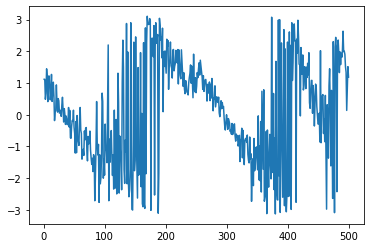

In [9]:
fun = np.vectorize(cmath.phase)
phases = fun(rec_d[:,0])
t = np.arange(1,500 + 1,1)
plt.plot(t,phases)

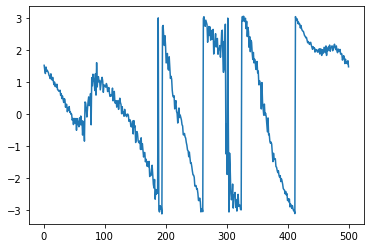

In [10]:
phases2 = fun(rec_d[:,1])
plt.plot(t,phases2)

In [11]:
def DFT_matrix(k,v):
  f = np.zeros((k,v))
  print(f.shape)
  for i in range(k):
    for j in range(v):
      f[i,j] = np.exp(-2*np.pi*1J*i/(j+0.00000000000000000000000000000000000001))
  return f

In [12]:
DFT_matrix(500,20)

(500, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.78019816,  1.        , -1.        , ...,  0.93247223,
         0.93969262,  0.94581724],
       [ 0.21741834,  1.        ,  1.        , ...,  0.73900892,
         0.76604444,  0.78914051],
       ...,
       [-0.09917444,  1.        , -1.        , ...,  0.09226836,
        -0.76604444,  0.54694816],
       [-0.38816289,  1.        ,  1.        , ..., -0.27366299,
        -0.5       ,  0.24548549],
       [ 0.69510413,  1.        , -1.        , ..., -0.60263464,
        -0.17364818, -0.08257935]])

In [13]:
def hypothesis(x,theta):
  f = DFT_matrix(500,20)
  w = np.zeros(500)
  v = np.zeros((4096,20))
  print(f.shape)
  print(v.transpose().shape)
  hyp = w + f@v.transpose()@theta@x
  return hyp 

In [14]:
hyp = hypothesis(tra_d,irs[:,1])

(500, 20)
(500, 20)
(20, 4096)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [15]:
def cost(hyp,y):
  cost = (hyp - y)@(hyp - y).transpose()
  cost = abs(cost)
  return cost

In [16]:
cost(hyp,rec_d[:,1])

2.455465501839481e-17

In [17]:
def initialize_base_network():
    input1 = tf.keras.Input(shape = (500,1))
    input2 = tf.keras.Input(shape = (4096,1))
    x1 = tf.keras.layers.Dense(128, activation='relu', name="first_base_dense")(input1)
    x2 = tf.keras.layers.Dense(128, activation='relu', name="first_base_dense")(x1)
    #x = Dropout(0.1, name="first_dropout")(x)
    x = tf.keras.layers.concatenate([x2,input2], axis = 1)
    x3 = Dense(128, activation='relu', name="second_base_dense")(x)
    x3 = Dropout(0.1, name="second_dropout")(x3)
    x_output = Dense(500,activation='relu', name="third_base_dense")(x3)

    return Model(inputs=[input1,input2], outputs=x_output)

In [ ]:
base_network = initialize_base_network()

In [18]:
tra_d.shape

(500, 1)

In [19]:
rec_d.shape

(500, 16384)

In [20]:
irs.shape

(4096, 16384)

In [46]:
# define two sets of inputs
inputA = Input(shape=(500))
inputB = Input(shape=(4096))
# the first branch operates on the first input
x = Dense(1024, activation="relu")(inputA)
x = Dense(4096, activation="relu")(x)
x = Dense(2048, activation="relu")(x)
x = Dense(1024, activation="relu")(x)
x = Dense(500, activation = "relu")(x)
x = Model(inputs=inputA, outputs=x)
# the second branch opreates on the second input
y = Dense(2048, activation="relu")(inputB)
y = Dense(1024, activation="relu")(y)
y = Dense(500, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
# combine the output of the two branches
combined = concatenate([x.output, y.output])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2048, activation="relu")(combined)
z = Dense(4096, activation="linear")(z)
z = Dense(2048, activation="linear")(z)
z = Dense(1024, activation="linear")(z)
z = Dense(500, activation="linear")(z)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

In [47]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 1024)         513024      input_7[0][0]                    
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 4096)         4198400     dense_22[0][0]                   
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 4096)]       0                                            
___________________________________________________________________________________________

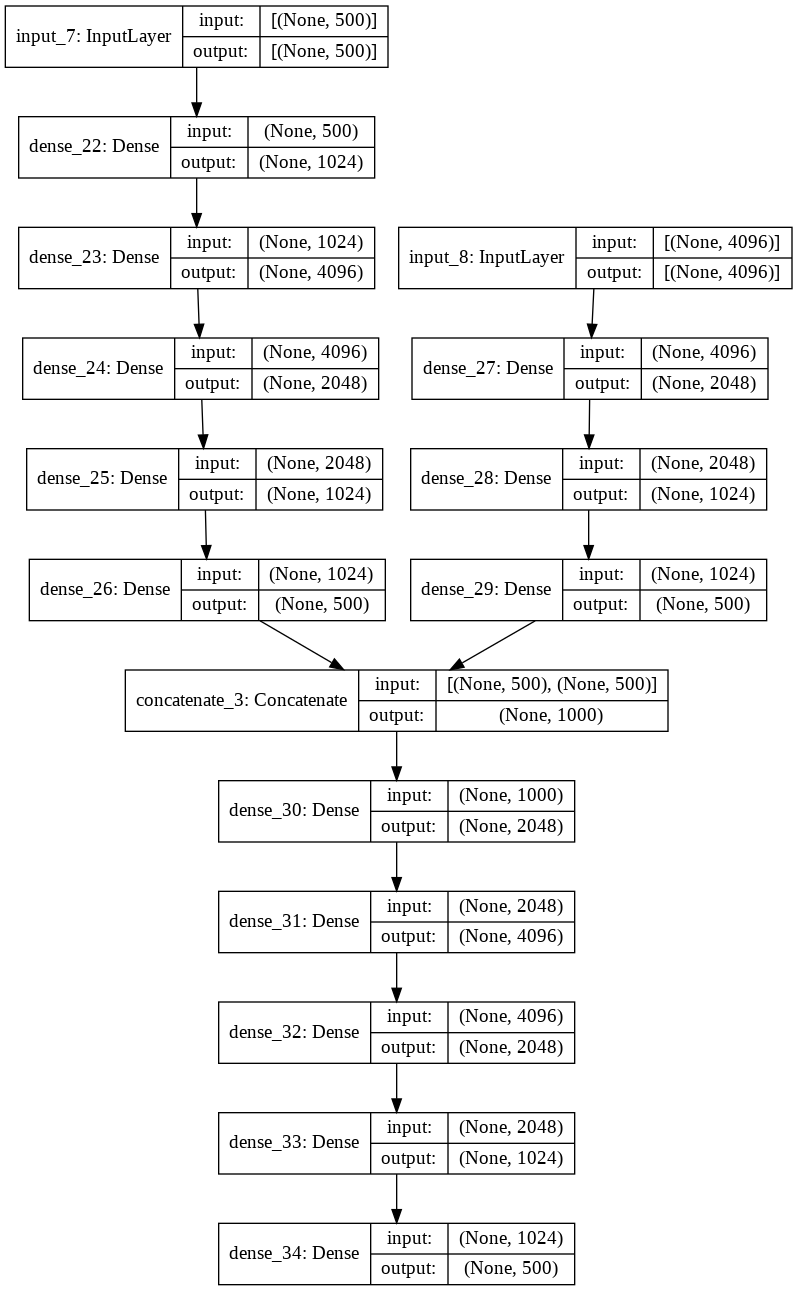

In [48]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [51]:
import keras
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.fit([tra_d[:,0].reshape(1, 500), irs[:,0].reshape(1, 4096)], rec_d[:, 0].reshape(-1, 500), epochs=5)

model.fit([(x1_tr).reshape(-1, 500), x2_train.reshape(-1, 4096)], abs(y_tr* 10 ** 5).reshape(-1, 500), epochs=5)

#results = model.evaluate([tra_d[:,0].reshape(1, 500), irs[:,1].reshape(1, 4096)], rec_d[:,1].reshape(1, 500))

Epoch 1/5
384/384 [==============================] - 5s 12ms/step - loss: 0.1607 - accuracy: 0.0017
Epoch 2/5
384/384 [==============================] - 4s 12ms/step - loss: 0.1404 - accuracy: 0.0034
Epoch 3/5
384/384 [==============================] - 4s 12ms/step - loss: 0.1406 - accuracy: 2.0861e-04
Epoch 4/5
384/384 [==============================] - 4s 12ms/step - loss: 0.1417 - accuracy: 0.0025
Epoch 5/5
384/384 [==============================] - 4s 12ms/step - loss: 0.1429 - accuracy: 0.0015
